In [1]:
import pandas as pd
import numpy as np

In [2]:
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_canada.shape)

(195, 43)


In [9]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_canada.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

In [11]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
all(isinstance(column,str)for column in df_canada.columns)

False

In [13]:
df_canada.columns=list(map(str,df_canada.columns))
all(isinstance(column,str)for column in df_canada.columns)

True

In [14]:
df_canada.set_index('Country',inplace=True)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [15]:
df_canada['Total']=df_canada.sum(axis=1)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
print('Data Dimensions',df_canada.shape)

Data Dimensions (195, 38)


In [17]:
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Matplotlib version:',mpl.__version__)

Matplotlib version: 3.1.3


In [20]:
df_canada.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df=df_canada.head()
df=df[years].transpose()
df.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


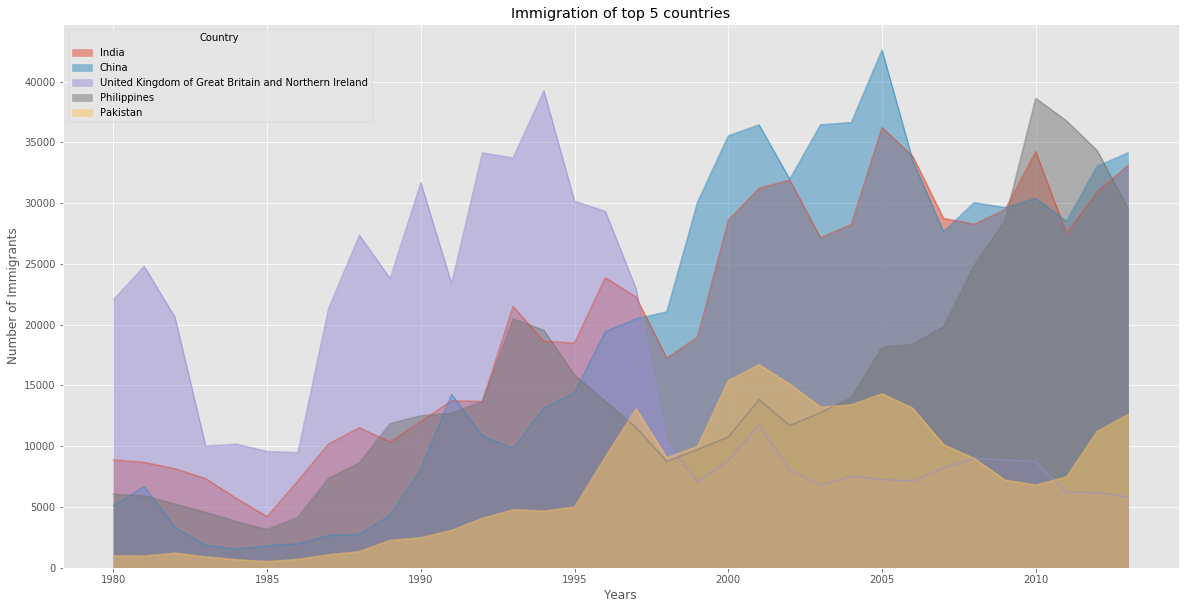

In [21]:
df.index=df.index.map(int)
df.plot(kind='area',stacked=False,figsize=(20,10),)
plt.title('Immigration of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

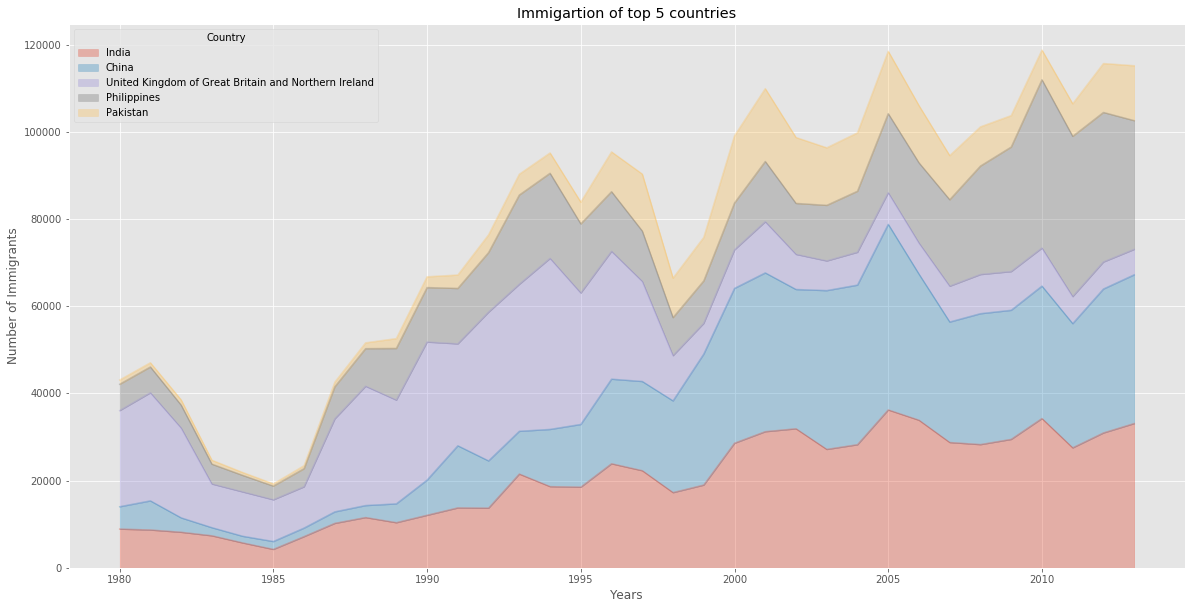

In [22]:
ax=df.plot(kind='area',alpha=0.35,figsize=(20,10))
ax.set_title('Immigartion of top 5 countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Text(0.5, 0, 'Years')

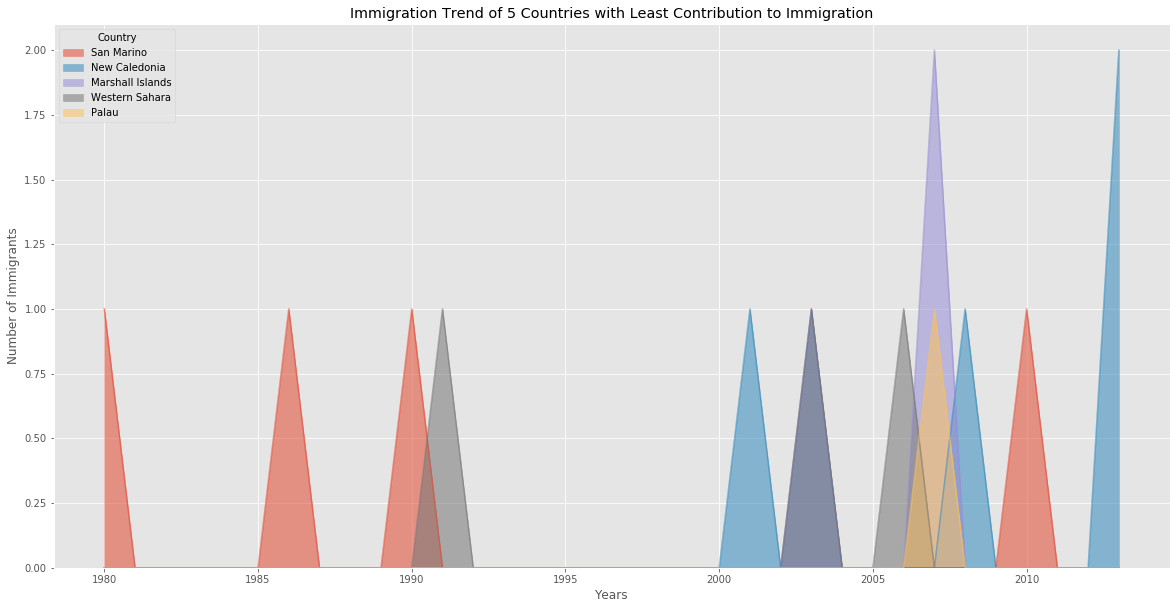

In [23]:
dfb = df_canada.tail(5)
dfb = dfb[years].transpose() 
dfb.head()
dfb.index = dfb.index.map(int)
ax = dfb.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [24]:
df_canada['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [26]:
count, bin_edges = np.histogram(df_canada['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


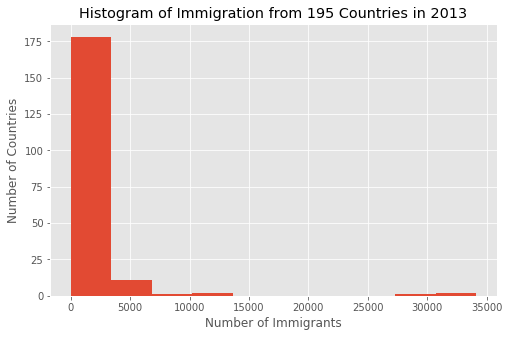

In [27]:
df_canada['2013'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

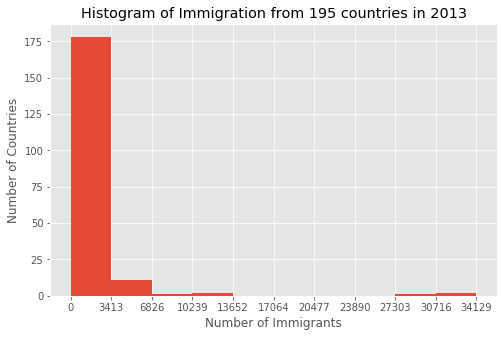

In [29]:
count, bin_edges = np.histogram(df_canada['2013'])
df_canada['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

In [30]:
df_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


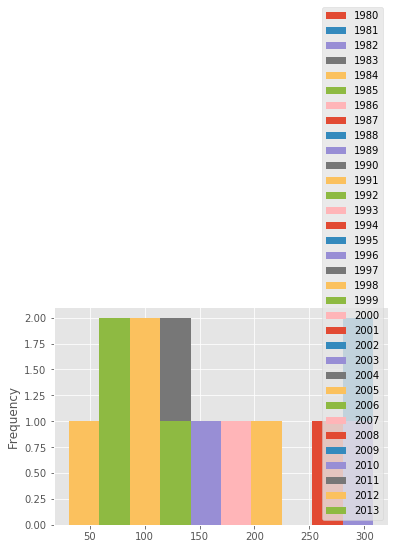

In [31]:
df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [32]:
dft = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
dft.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


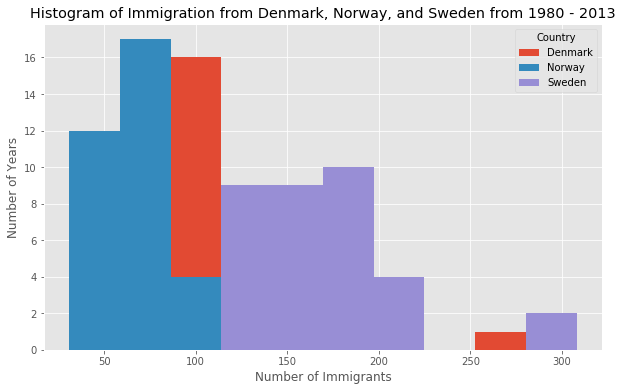

In [33]:
dft.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

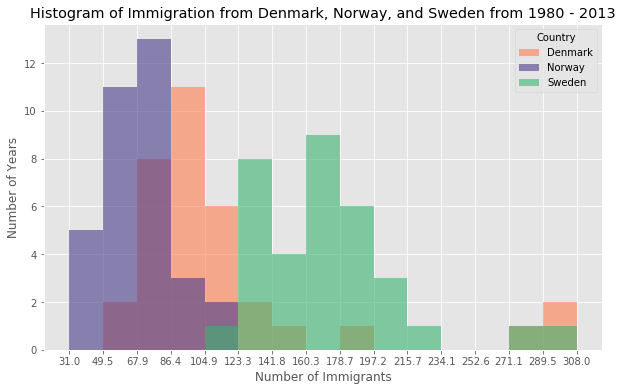

In [37]:
count, bin_edges = np.histogram(dft, 15)
dft.plot(kind ='hist',figsize=(10,6),bins=15,alpha=0.6,xticks=bin_edges,color=['coral','darkslateblue','mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

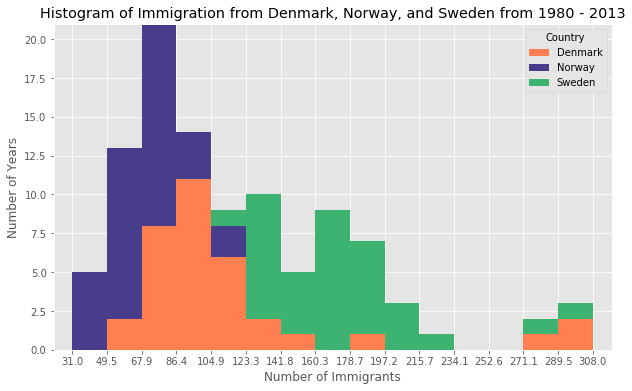

In [38]:
count, bin_edges = np.histogram(dft, 15)
xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10
dft.plot(kind='hist',figsize=(10,6),bins=15,xticks=bin_edges,color=['coral','darkslateblue','mediumseagreen'],stacked=True,xlim=(xmin,xmax))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

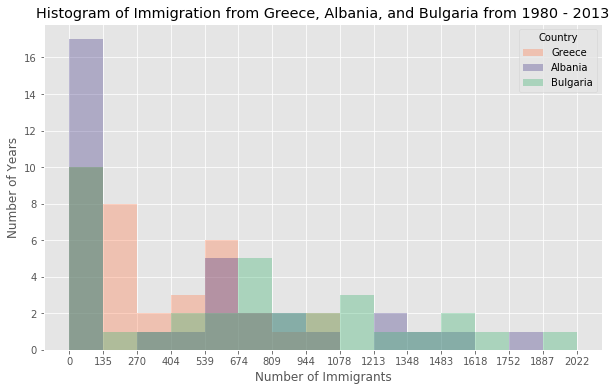

In [40]:
df_cof = df_canada.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof = df_cof.transpose() 
count, bin_edges = np.histogram(df_cof, 15)
df_cof.plot(kind ='hist',figsize=(10,6),bins=15,alpha=0.35,xticks=bin_edges,color=['coral','darkslateblue','mediumseagreen'])
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show

In [42]:
df_iceland = df_canada.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

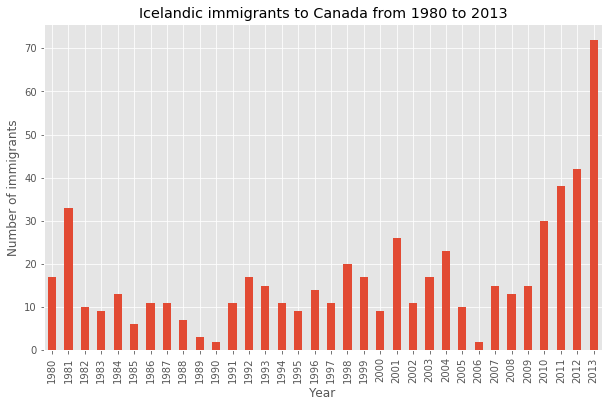

In [43]:
df_iceland.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.show()

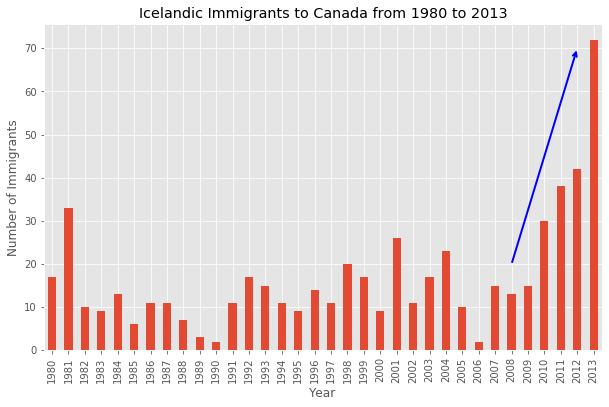

In [44]:
df_iceland.plot(kind='bar',figsize=(10, 6),rot=90)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.annotate('',xy=(32, 70),xytext=(28, 20),xycoords='data',arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

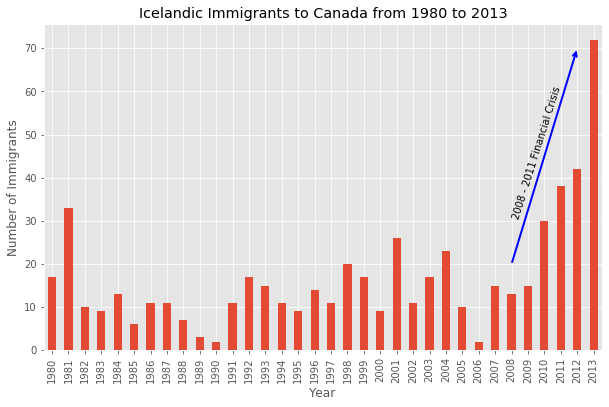

In [45]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.annotate('',xy=(32,70),xytext=(28,20),xycoords='data',arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('2008 - 2011 Financial Crisis',xy=(28, 30),rotation=72.5,va='bottom',ha='left',)
plt.show()

In [50]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

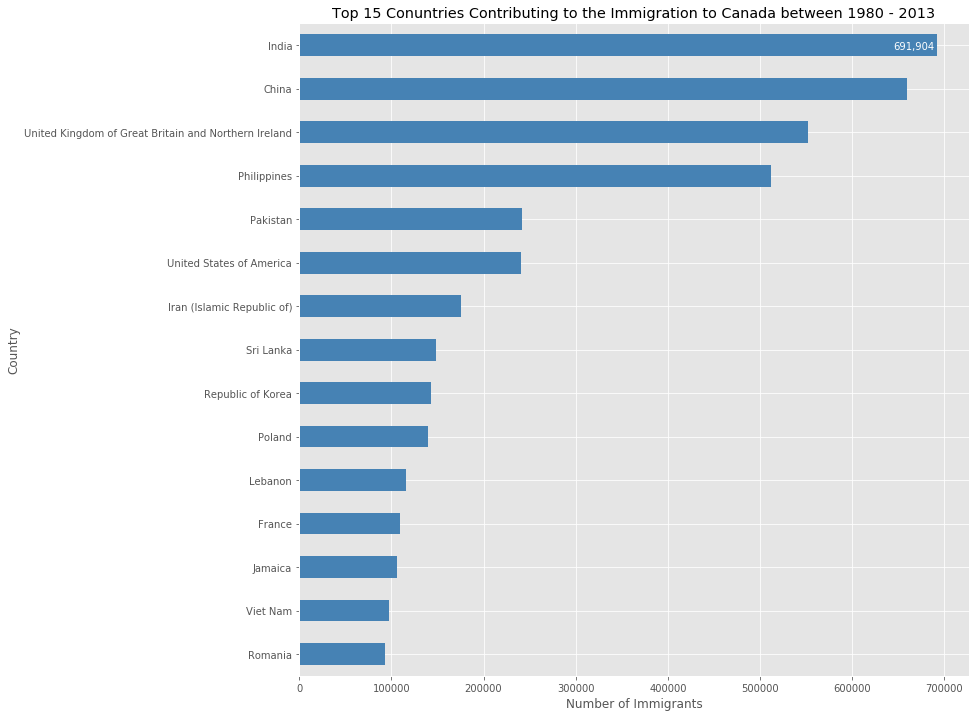

In [53]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
for index, value in enumerate(df_top15): 
 label = format(int(value), ',') 
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.3


In [7]:
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


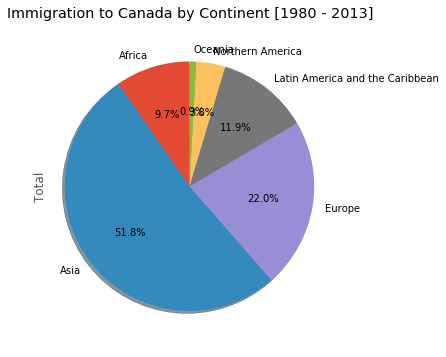

In [8]:
df_continents['Total'].plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True,)
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.show()

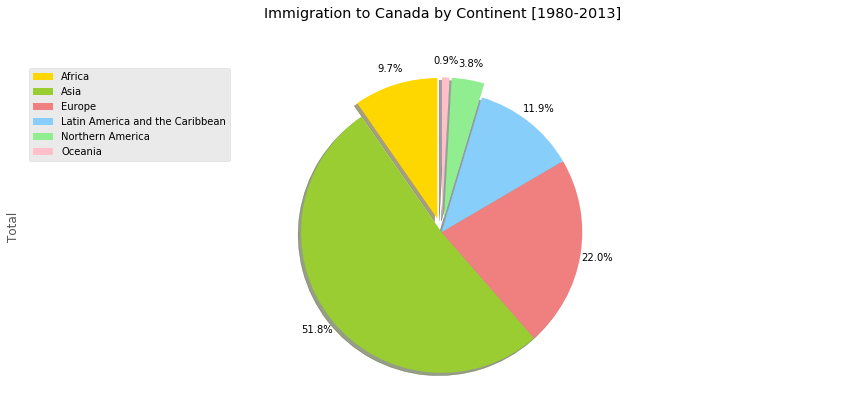

In [9]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list = [0.1,0,0,0,0.1,0.1]
df_continents['Total'].plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12,colors=colors_list,explode=explode_list)
plt.title('Immigration to Canada by Continent [1980-2013]',y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

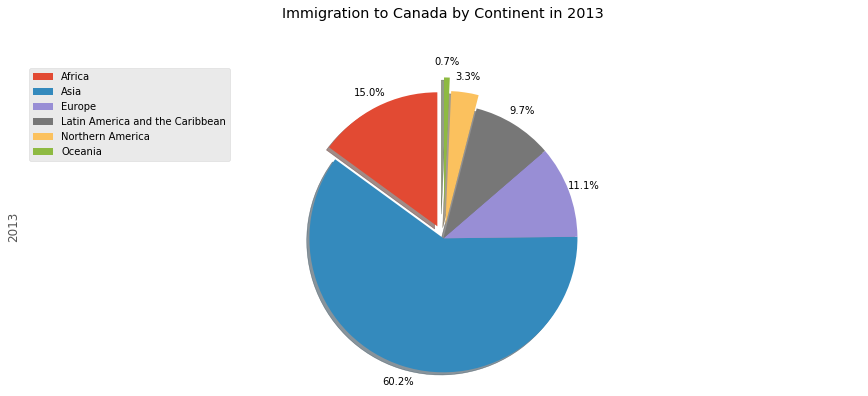

In [10]:
explode_list = [0.1,0,0,0,0.1,0.2]
df_continents['2013'].plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12,explode=explode_list)
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [11]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


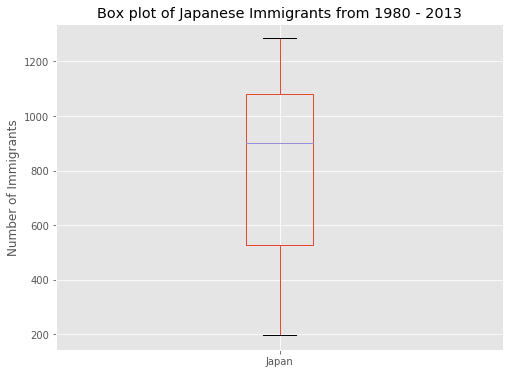

In [12]:
df_japan.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [13]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [14]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [15]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


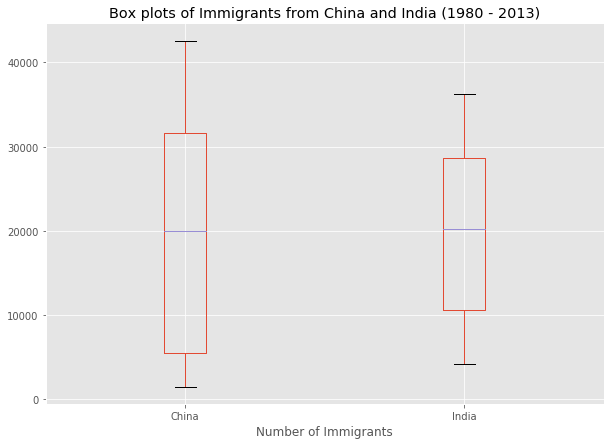

In [16]:
df_CI.plot(kind='box', figsize=(10, 7))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

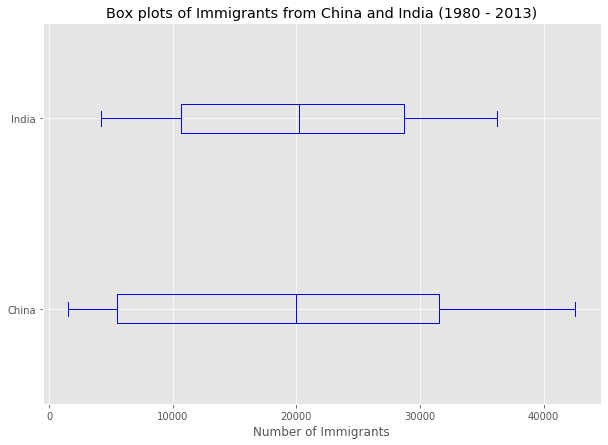

In [17]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

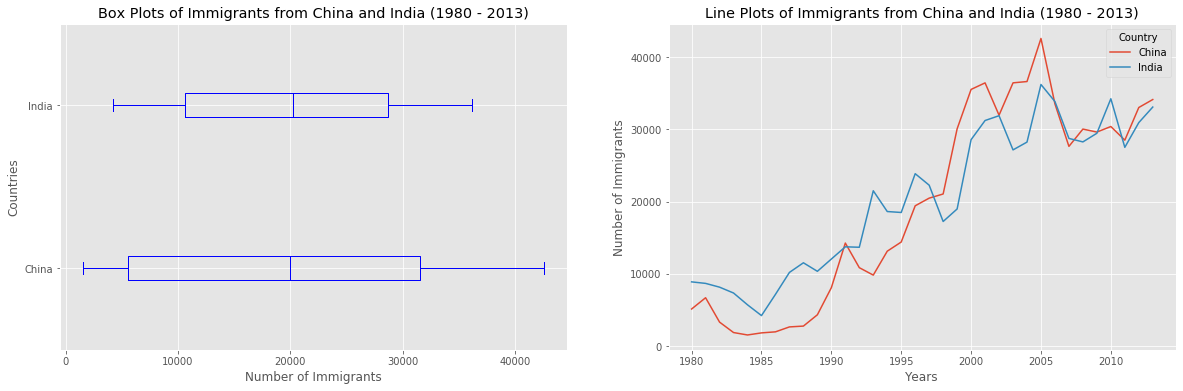

In [19]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

In [20]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [21]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [22]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


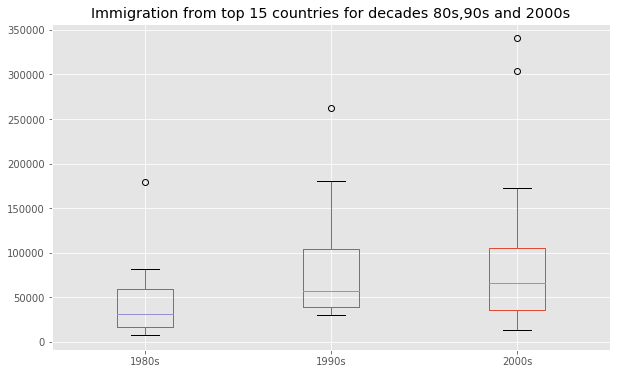

In [23]:
new_df.plot(kind='box',figsize=(10,6))
plt.title('Immigration from top 15 countries for decades 80s,90s and 2000s')
plt.show()

In [24]:
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [25]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


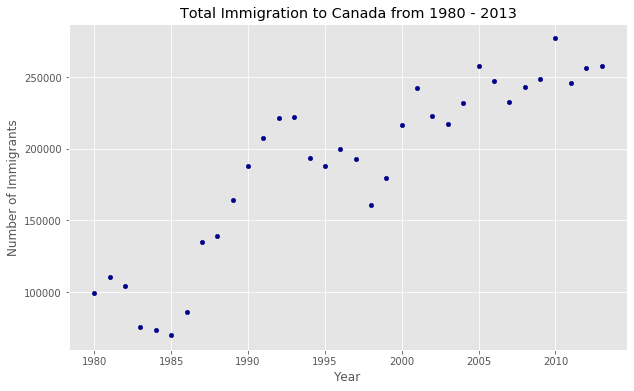

In [26]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

In [27]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

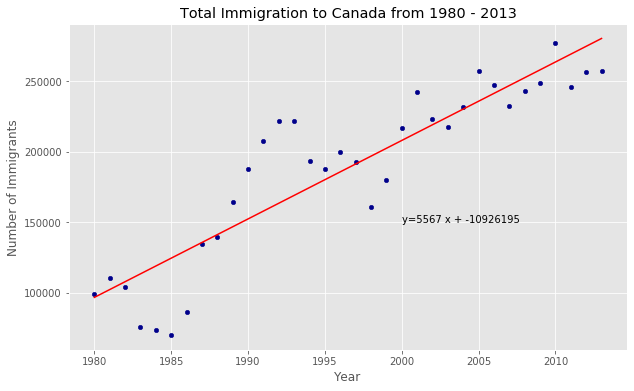

'No. Immigrants = 5567 * Year + -10926195'

In [28]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [29]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


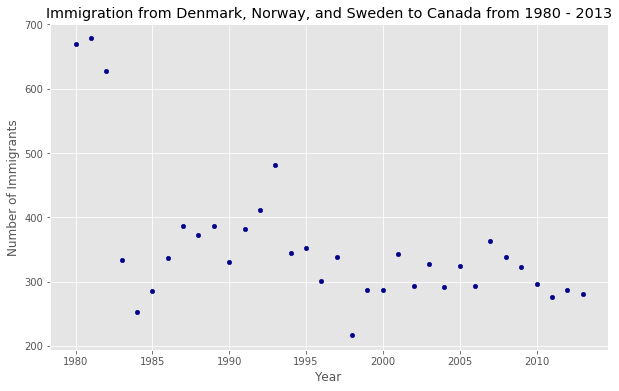

In [30]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

In [31]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [32]:
norm_brazil=(df_can_t['Brazil']-df_can_t['Brazil'].min())/(df_can_t['Brazil'].max()-df_can_t['Brazil'].min())
norm_argentina=(df_can_t['Argentina']-df_can_t['Argentina'].min())/(df_can_t['Argentina'].max()-df_can_t['Argentina'].min())

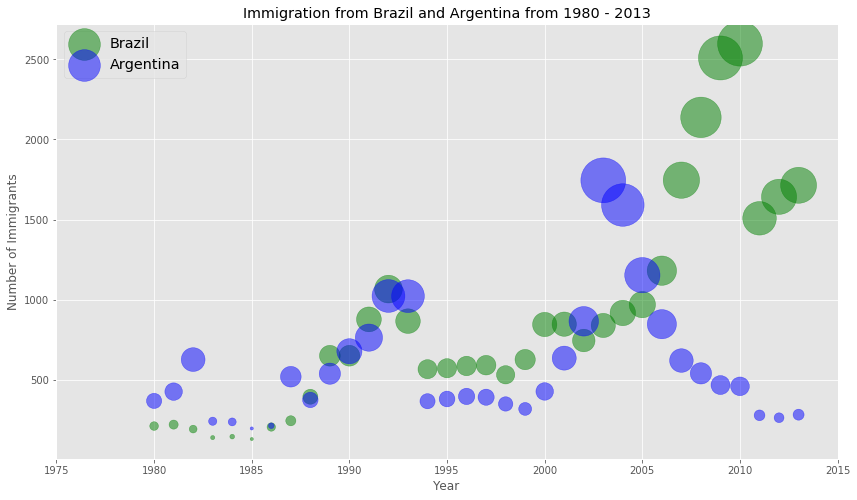

In [33]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=norm_brazil * 2000 + 10, 
                    xlim=(1975, 2015)
                   )


ax1 = df_can_t.plot(kind='scatter',x='Year',y='Argentina',alpha=0.5,color="blue",s=norm_argentina * 2000 + 10,ax = ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil','Argentina'],loc='upper left',fontsize='x-large')

In [34]:
norm_china=(df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min())
norm_india=(df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min())

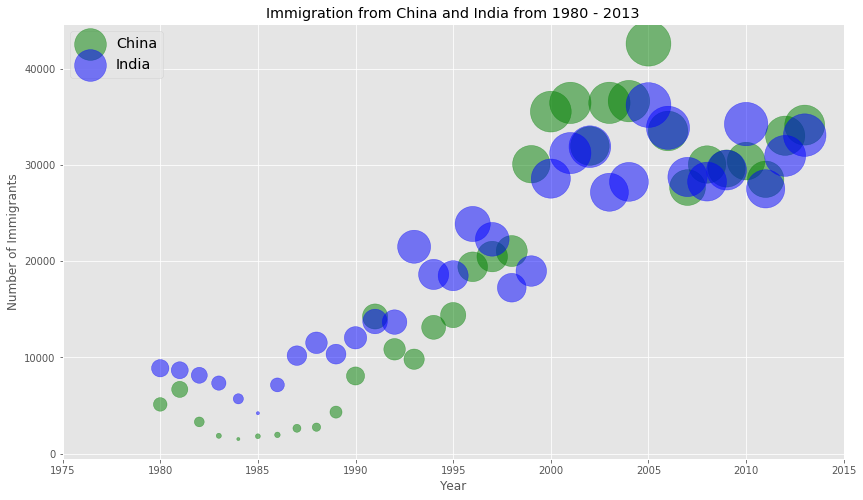

In [35]:
ax0=df_can_t.plot(kind='scatter',x='Year',y='China',figsize=(14,8),alpha=0.5,color='green',s=norm_china*2000+10,xlim=(1975,2015))
ax1 = df_can_t.plot(kind='scatter',x='Year',y='India',alpha=0.5,color="blue",s=norm_india * 2000 + 10,ax = ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China','India'],loc='upper left',fontsize='x-large')